In [122]:
import pandas as pd
import random
import numpy as np

In [123]:
price_data = pd.read_csv("data/结果/full_销售单价.csv").iloc[:, 4:-1].values
mask = price_data > 0

price_means = np.sum(price_data * mask, axis=0) / np.sum(mask, axis=0).ravel()

In [124]:
price_means[:5]

array([3.25, 7.5 , 8.25, 7.  , 6.75])

In [125]:
sale_data= pd.read_csv("data/结果/result_2023_multi.csv").iloc[-1:, 1:].values.reshape(-1).ravel()

In [126]:
sale_data[:5]

array([57000., 21850., 22400., 33040.,  9875.])

In [127]:
sale_data_regress=pd.read_csv("data/结果/full_预期销售量_sim - 副本.csv")
sale_data_regress

,年份,季度,黄豆,黑豆,红豆,绿豆,爬豆,小麦,玉米,谷子,...,空心菜,黄心菜,芹菜,大白菜,白萝卜,红萝卜,榆黄菇,香菇,白灵菇,羊肚菌
0,2023,1,3.25,7.5,8.25,7,6.75,3.5,3,6.75,...,4.500000,4.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2023,2,0.00,0.0,0.00,0,0.00,0.0,0,0.00,...,0.000000,0.000000,0.000000,2.500000,2.500000,3.250000,57.500000,19.000000,16.000000,100.000000
2,2024,1,3.25,7.5,8.25,7,6.75,3.5,3,6.75,...,4.725000,4.725000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2024,2,0.00,0.0,0.00,0,0.00,0.0,0,0.00,...,0.000000,0.000000,0.000000,2.625000,2.625000,3.412500,55.941750,18.485100,15.566400,95.000000
4,2025,1,3.25,7.5,8.25,7,6.75,3.5,3,6.75,...,4.961250,4.961250,4.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2025,2,0.00,0.0,0.00,0,0.00,0.0,0,0.00,...,0.000000,0.000000,0.000000,2.756250,2.756250,3.583125,54.447497,17.991347,15.150608,90.250000
6,2026,1,3.25,7.5,8.25,7,6.75,3.5,3,6.75,...,5.209313,5.209313,4.630500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,2026,2,0.00,0.0,0.00,0,0.00,0.0,0,0.00,...,0.000000,0.000000,0.000000,2.894062,2.894062,3.762281,53.123837,17.553964,14.782285,85.737500
8,2027,1,3.25,7.5,8.25,7,6.75,3.5,3,6.75,...,5.469778,5.469778,4.862025,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,2027,2,0.00,0.0,0.00,0,0.00,0.0,0,0.00,...,0.000000,0.000000,0.000000,3.038766,3.038766,3.950395,51.741435,17.097170,14.397617,81.450625


回归系数（斜率）: -7532.294807370185
回归截距: 78169.53098827471


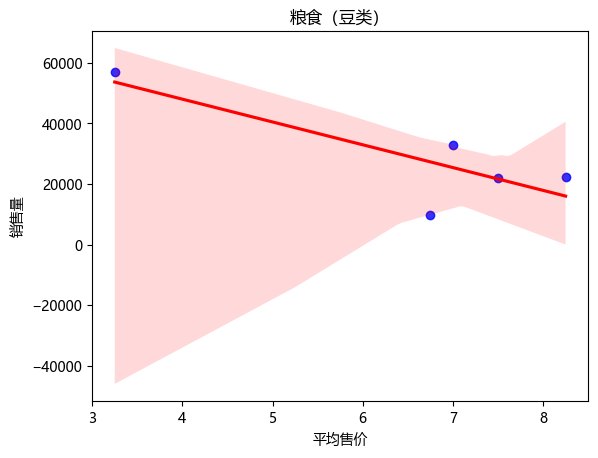

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

plt.rcParams["font.family"] = "Microsoft YaHei"

data = pd.DataFrame({"平均售价": price_means[:5], "销售量": sale_data[:5]})

sns.regplot(
    x="平均售价",
    y="销售量",
    data=data,
    scatter_kws={"color": "blue"},
    line_kws={"color": "red"},
)

model = LinearRegression()
model.fit(price_means[:5].reshape(-1, 1), sale_data[:5])

slope = model.coef_[0]
intercept = model.intercept_

print(f"回归系数（斜率）: {slope}")
print(f"回归截距: {intercept}")

sale_data_regress.iloc[:, 2:7] = sale_data_regress.iloc[:, 2:7].applymap(
    lambda x: slope * x + intercept if x > 0 else 0
)

plt.title("粮食（豆类）")
plt.xlabel("平均售价")
plt.ylabel("销售量")

plt.show()

回归系数（斜率）: -1726.8632394599274
回归截距: 62380.95758661306


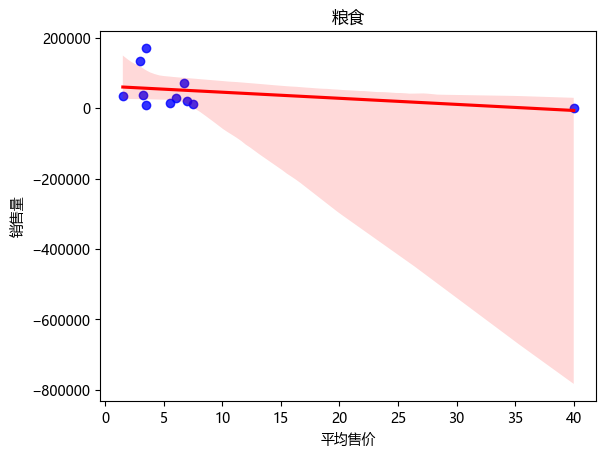

In [129]:
data = pd.DataFrame({'平均售价': price_means[5:16], '销售量': sale_data[5:16]})

sns.regplot(x='平均售价', y='销售量', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

model = LinearRegression()
model.fit(price_means[5:16].reshape(-1, 1), sale_data[5:16])

slope = model.coef_[0]
intercept = model.intercept_

print(f"回归系数（斜率）: {slope}")
print(f"回归截距: {intercept}")

sale_data_regress.iloc[:, 7:19] = sale_data_regress.iloc[:, 7:19].applymap(
    lambda x: slope * x + intercept if x > 0 else 0
)

plt.title('粮食')
plt.xlabel('平均售价')
plt.ylabel('销售量')

plt.show()

回归系数（斜率）: 15634.933123524792
回归截距: -90236.12903225813


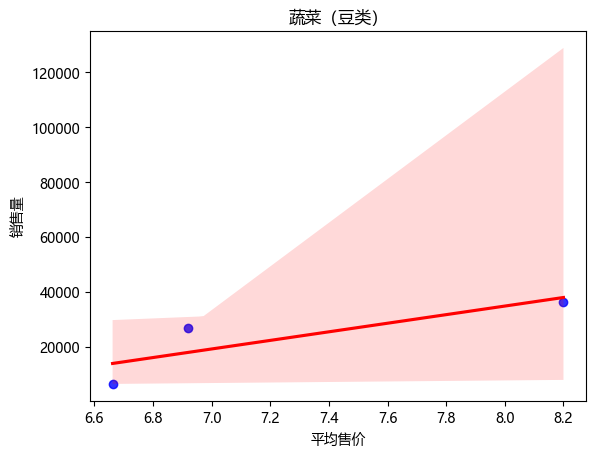

In [130]:
data = pd.DataFrame({'平均售价': price_means[16:19], '销售量': sale_data[16:19]})

sns.regplot(x='平均售价', y='销售量', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

model = LinearRegression()
model.fit(price_means[16:19].reshape(-1, 1), sale_data[16:19])

slope = model.coef_[0]
intercept = model.intercept_

print(f"回归系数（斜率）: {slope}")
print(f"回归截距: {intercept}")

sale_data_regress.iloc[:, 18:21] = sale_data_regress.iloc[:, 18:21].applymap(
    lambda x: slope * x + intercept if x > 0 else 0
)

plt.title('蔬菜（豆类）')
plt.xlabel('平均售价')
plt.ylabel('销售量')

plt.show()

回归系数（斜率）: -17437.484435278653
回归截距: 115506.183375938


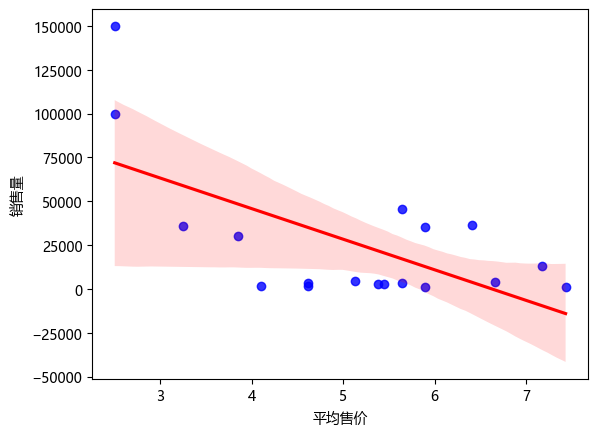

In [131]:
data = pd.DataFrame({'平均售价': price_means[19:37], '销售量': sale_data[19:37]})

sns.regplot(x='平均售价', y='销售量', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

model = LinearRegression()
model.fit(price_means[19:37].reshape(-1, 1), sale_data[19:37])

slope = model.coef_[0]
intercept = model.intercept_

print(f"回归系数（斜率）: {slope}")
print(f"回归截距: {intercept}")

sale_data_regress.iloc[:, 21:39] = sale_data_regress.iloc[:, 21:39].applymap(
    lambda x: slope * x + intercept if x > 0 else 0
)

plt.show()

回归系数（斜率）: -104.24564368787473
回归截距: 14616.821602478973


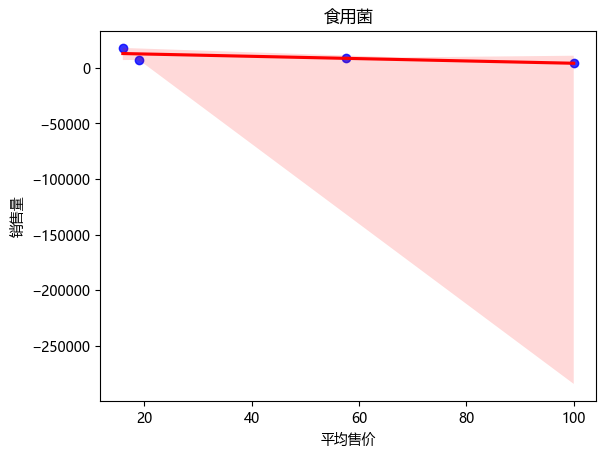

In [132]:
data = pd.DataFrame({'平均售价': price_means[37:], '销售量': sale_data[37:]})

sns.regplot(x='平均售价', y='销售量', data=data, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

model = LinearRegression()
model.fit(price_means[37:].reshape(-1, 1), sale_data[37:])

slope = model.coef_[0]
intercept = model.intercept_

print(f"回归系数（斜率）: {slope}")
print(f"回归截距: {intercept}")

sale_data_regress.iloc[:, 39:] = sale_data_regress.iloc[:, 39:].applymap(
    lambda x: slope * x + intercept if x > 0 else 0
)

plt.title('食用菌')
plt.xlabel('平均售价')
plt.ylabel('销售量')

plt.show()

In [133]:
sale_data_regress.clip(lower=0).to_csv("data/结果/full_预期销售量_regress.csv", index=False,encoding='utf-8-sig')

In [134]:
sale_data = pd.read_csv("data/结果/full_预期销售量_regress.csv")
sale_data_mean1 = sale_data[sale_data["季度"] == 1].mean().values[2:]
sale_data_mean2 = sale_data[sale_data["季度"] == 2].mean().values[2:]
sale_data_mean1

array([5.36895729e+04, 2.16773199e+04, 1.60280988e+04, 2.54434673e+04,
       2.73265410e+04, 5.63369362e+04, 5.72003679e+04, 5.07246307e+04,
       5.20197781e+04, 4.94294833e+04, 0.00000000e+00, 5.97906627e+04,
       5.67686521e+04, 5.28832098e+04, 5.63369362e+04, 5.02929149e+04,
       7.17411737e+08, 3.57354748e+04, 3.10698599e+04, 3.74534783e+04,
       9.49324678e+02, 6.08214709e+03, 3.80393118e+03, 8.95963688e+03,
       6.08214709e+03, 2.70316818e+02, 1.24994820e+04, 3.80393118e+03,
       0.00000000e+00, 8.95963688e+03, 0.00000000e+00, 2.18429373e+04,
       2.18429373e+04, 3.22499647e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])